In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import changefinder
import ruptures as rpt
%matplotlib inline

In [3]:
df = pd.read_csv('watt_analytics_data.csv')
df['ts'] = pd.to_datetime(df['ts'], unit='ms',utc=True)
df.set_index('ts',inplace=True, drop=True)
df.head()

,pwrA,pwrB,pwrC,rpwrA,rpwrB,rpwrC
ts,,,,,,
2022-02-17 12:29:03.320000+00:00,168.586,37.383,35.605,27.808,-102.561,-101.412
2022-02-17 12:29:03.570000+00:00,168.632,37.519,36.106,24.366,-102.372,-100.125
2022-02-17 12:29:03.820000+00:00,171.048,37.337,36.334,27.327,-102.516,-101.429
2022-02-17 12:29:04.070000+00:00,171.094,37.383,36.015,28.913,-101.430,-101.070
2022-02-17 12:29:04.320000+00:00,174.330,37.383,35.878,25.974,-101.456,-101.579


In [ ]:
# fig = plt.figure(figsize=[10,8])
# plt.scatter(dfA['pwrA'],dfA['rpwrA'])

<AxesSubplot:xlabel='ts'>

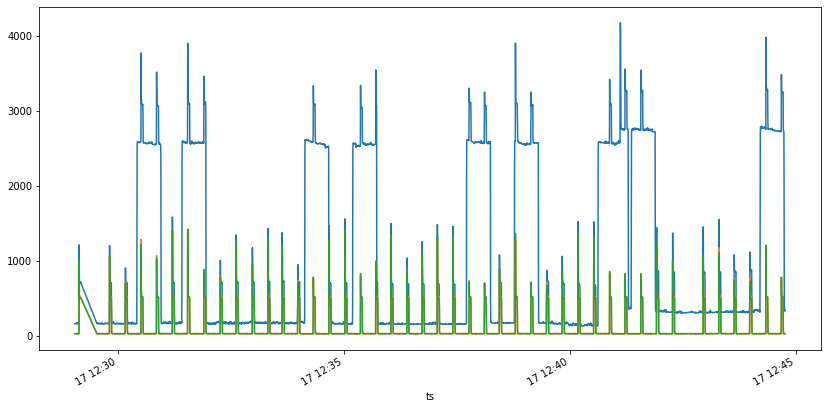

In [9]:
fig = plt.figure(figsize=[14,7])
dfA = df[['pwrA','pwrB','pwrC']].iloc[:3600].copy()
# dfA = dfA.resample('1S').mean()
dfA.dropna(inplace=True)
dfA['pwrA'].plot()
dfA['pwrB'].plot()
dfA['pwrC'].plot()
# dfA['rpwrB'].plot()

In [4]:
ts1 = dfA[['pwrA','rpwrA']].to_numpy()

In [ ]:
# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

for i in range(4,5):
    print(i)
    dfA = df[['pwrA','rpwrA']].iloc[i*(3600):(i+1)*(3600)].copy()
    dfA.dropna(inplace=True)
    print('size:',dfA.shape)
    ts1 = dfA[['pwrA','rpwrA']].to_numpy()

    # Detect the change points
    algo1 = rpt.Pelt(model="rbf").fit(ts1)
    change_location1 = algo1.predict(pen=10)


    plot_change_points(ts1,change_location1)

In [ ]:
def findChangePoints(ts, r, order, smooth):
    
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')
    return(ts_score)
    
ts_score1 = findChangePoints(ts1, r = 0.1, order = 3, smooth = 8)
print(ts_score1)

In [ ]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(3)
ts_change_loc1 = ts_change_loc1.index
ts_change_loc1

In [ ]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')
        
plot_change_points(ts1,ts_change_loc1)